# Exploratory analysis 

This notebook contains code for exploratory data analysis of data used in the project: Public attitudes and ethical guidelines in digital field experiments (digex).

# TO DO

**We can roughly use the below bullet points taken from [2022-digex-study-design](https://docs.google.com/document/d/1nsaXEn04s9LTsjqrpbUpZlyQ3CAcuqkOwy1ZM0d-kKY/edit#) as section headings for this notebook to conduct the exploratory analysis**:

- To address question 1, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for the variables: awareness of the fact that academic researchers use social media data, awareness of the advantages of social media data that account for why academics collect them, awareness of social media data use, and awareness of social media interaction methods. 

- To address question 2, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for each of the 4 vignette studies presented in section 2 of the survey for the variable: attitudes towards actual research studies. 

- To address question 3, we will provide frequency tables or plots for the variables attitudes towards study design factors and attitudes towards ethical principles. Moreover, we will also use a mixed-methods approach to analyze open-ended free-text responses (see below).

- To further address questions 1-3, open-ended free-text inputs of both the open “other” options of selection items and the  open-ended free-text answers (i.e., what do you think it means for an academic study to receive "ethical approval”, describe any concerns you might have, what additional information about the study or the researchers that would influence your level of concern, are there any other features of research that are important for determining your level of concern, are there any additional factors that you think should be libsidered) will be analyzed using a mixed-methods approach to detect common topics, sentiments, and themes. 

## Set working directory

In [1]:
import pathlib   # Change cwd
import os 

path = pathlib.Path.cwd().parent
os.chdir(path)

## Imports

In [2]:
import joypy    # 3rd party packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
from IPython.display import HTML
from matplotlib import pyplot as plt
%matplotlib inline

from digex_src import config    # Local imports
from digex_src.load_data import get_data_filepath

## Plotting presets

In [3]:
# set default style
digex_style = config.MPL_STYLE_FILEPATH
digex_palette = config.PALETTE

# set size for inline polots
mpl.rcParams['figure.dpi'] = 200

plt.style.use(digex_style)
sns.color_palette(digex_palette)

[(0.00392156862745098, 0.09803921568627451, 0.34901960784313724),
 (0.058823529411764705, 0.2235294117647059, 0.37254901960784315),
 (0.08627450980392157, 0.3137254901960784, 0.3843137254901961),
 (0.15294117647058825, 0.38823529411764707, 0.37254901960784315),
 (0.2823529411764706, 0.44313725490196076, 0.30980392156862746),
 (0.42745098039215684, 0.48627450980392156, 0.23137254901960785),
 (0.592156862745098, 0.5333333333333333, 0.17254901960784313),
 (0.7686274509803922, 0.5686274509803921, 0.2196078431372549),
 (0.9215686274509803, 0.6039215686274509, 0.3764705882352941),
 (0.9882352941176471, 0.6627450980392157, 0.5843137254901961),
 (0.9921568627450981, 0.7294117647058823, 0.7803921568627451),
 (0.9803921568627451, 0.8, 0.9803921568627451)]

## Load processed data

### 1. With `load_data.py`

In [4]:
processed_data_path = get_data_filepath(
    file=config.PROCESSED_DATA_FILEPATH, 
    data_path=config.PROCESSED_DATA_DIR,
    main=False
) 

digex_df = pd.read_csv(processed_data_path, index_col=0)

digex_df.head()

,finished,duration_sec,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_anony,rank_harms,rank_balance,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos
1,True,912.0,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,6.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,True,720.0,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,6.0,1.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,True,1874.0,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,3.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,True,1264.0,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,3.0,4.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,NaN
5,True,556.0,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,2.0,4.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2. With filepath

In [33]:
digex_df = pd.read_csv('/Users/jasonburton/Documents/GitHub/article-digex-survey/data/processed/digex-survey-responses-processed.csv', index_col=0)

digex_df.head()

,finished,duration_sec,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_anony,rank_harms,rank_balance,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos
1,True,912.0,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,6.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,True,720.0,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,6.0,1.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,True,1874.0,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,3.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,True,1264.0,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,3.0,4.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,NaN
5,True,556.0,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,2.0,4.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory data analysis

Resources:
- https://aeturrell.github.io/coding-for-economists/data-exploratory-analysis.html#the-pandas-profiling-package
- https://deepnote.com/@deepnote/Joyplot-Introduction-4666e1a3-3249-442e-9a94-2bbcc5cb1b1d

### Demographics

- See `02-digex-summary-statistics.ipynb`


### Prior awareness

**Variables to examine: 8-15**

In [5]:
digex_df[['aware_sm_res']].count()

aware_sm_res    499
dtype: int64

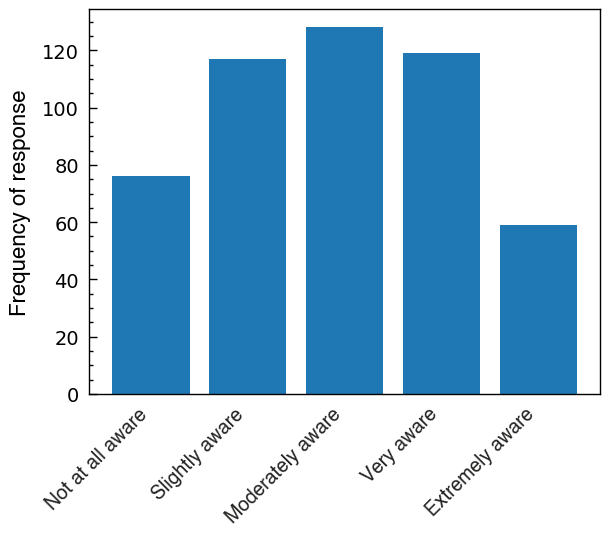

In [59]:
# Count the occurrences of each value in the 'aware_sm_res' column
value_counts = digex_df['aware_sm_res'].value_counts()

# Define the desired order of the x-axis values
desired_order = [
    "Not at all aware",
    "Slightly aware",
    "Moderately aware",
    "Very aware",
    "Extremely aware"
]

# Reindex the value_counts series using the desired order
sorted_values = value_counts.reindex(desired_order, fill_value=0)

# Create the bar chart
plt.bar(sorted_values.index, sorted_values.values)

# Set the chart title and labels
plt.ylabel('Frequency of response', fontsize=8, color='black', font='Helvetica')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right', fontsize=7, fontname='Helvetica', color='#242423')

# Remove tick labels
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', right=False)


# Display the chart
plt.show()



In [6]:
digex_df[['aware_sm_interact']]

,aware_sm_interact
1,"['Creating fake accounts (""bots"")', 'Secretly ..."
2,"['Privately messaging users', ""Publicly postin..."
3,"['Privately messaging users', ""Publicly postin..."
4,"['Creating fake accounts (""bots"")']"
5,"['Privately messaging users', ""Publicly postin..."
...,...
495,"['Creating fake accounts (""bots"")', 'Secretly ..."
496,"[""Publicly posting on users' profiles""]"
497,"['Creating fake accounts (""bots"")']"
498,"['Privately messaging users', ""Publicly postin..."


JB: struggling here... trying to parse the values to make dummy variables such that theres a separate column for `Secretly changing the content of what users see'`, `Hacking into users' accounts`, etc. with a 1 indicating that the participant checked the box and 0 indicating that they didn't

In [7]:
# remove brackets from the column values
digex_df['aware_sm_interact'] = digex_df['aware_sm_interact'].replace('\[', '', regex=True).replace('\]', '', regex=True)

# parse by comma separators
digex_df['aware_sm_interact'] = digex_df['aware_sm_interact'].apply(lambda x: x.split(','))

In [8]:
# get dummies
dummy_df = pd.get_dummies(digex_df['aware_sm_interact'].apply(pd.Series).stack()).sum(level=0)

/var/folders/hb/n58jwxy14vnc7667mqz9vyn40000gn/T/ipykernel_19608/1150893256.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(digex_df['aware_sm_interact'].apply(pd.Series).stack()).sum(level=0)


In [9]:
# view dummies
dummy_df

,"""Hacking into users' accounts""","""Publicly posting on users' profiles""","'Creating fake accounts (""bots"")'",'Secretly changing the content of what users see',"""Publicly posting on users' profiles""","'Creating fake accounts (""bots"")'",'None of the above','Privately messaging users','Secretly changing the content of what users see'
1,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0
3,0,1,1,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0
5,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
495,0,0,0,1,0,1,0,0,0
496,0,0,0,0,1,0,0,0,0
497,0,0,0,0,0,1,0,0,0
498,0,1,0,0,0,0,0,1,0


**Why does `dummy_df` have 9 columns with some column names looking identical?**

In [10]:
# janky fix -- add the identical cols together
dummy_df['public_post'] = dummy_df[dummy_df.columns[1]] | dummy_df[dummy_df.columns[4]]
dummy_df['use_bots'] = dummy_df[dummy_df.columns[2]] | dummy_df[dummy_df.columns[5]]
dummy_df['secrent_content_change'] = dummy_df[dummy_df.columns[3]] | dummy_df[dummy_df.columns[8]]

In [11]:
df_sum = dummy_df.sum(axis=0)
df_sum

 "Hacking into users' accounts"                        17
 "Publicly posting on users' profiles"                150
 'Creating fake accounts ("bots")'                    233
 'Secretly changing the content of what users see'    136
"Publicly posting on users' profiles"                  64
'Creating fake accounts ("bots")'                      98
'None of the above'                                    69
'Privately messaging users'                           258
'Secretly changing the content of what users see'      10
public_post                                           214
use_bots                                              331
secrent_content_change                                146
dtype: int64

In [12]:
digex_df['aware_sm_res'].value_counts(normalize=False, dropna=False)

Moderately aware    128
Very aware          119
Slightly aware      117
Not at all aware     76
Extremely aware      59
Name: aware_sm_res, dtype: int64

Privately messaging users # Publicly posting on users’ profiles # Creating fake accounts (“bots”) # Secretly changing the content of what users see # Hacking into users’ accounts, None of the above

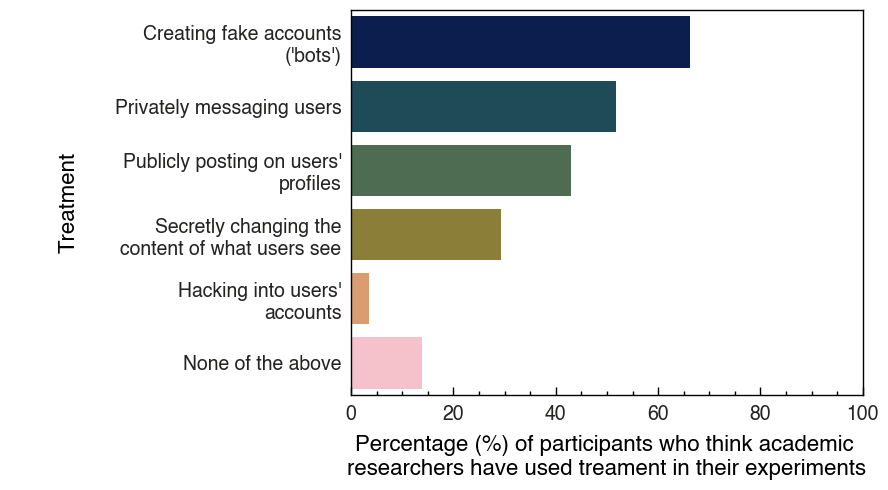

In [14]:
df = pd.DataFrame({'interaction':df_sum.index, 'count':df_sum.values})

df.loc[df['interaction'] == df.interaction[1], 'count'] = 214
df.loc[df['interaction'] == df.interaction[2], 'count'] = 331
df.loc[df['interaction'] == df.interaction[3], 'count'] = 146

df = df.drop([4, 5, 8, 9, 10, 11])
df = df.sort_values('count', ascending=False)
df['total'] = 499

# Calculate percentage
df['percentage'] = (df['count'] / df['total']) * 100

df = df.reset_index()
df.iloc[5], df.iloc[4] = df.iloc[4], df.iloc[5]

sns.barplot(
    data=df, x="percentage", y="interaction", palette=digex_palette[0::2])

# Set x-axis range
plt.xlim(0, 100)

# Remove tick labels
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    bottom=True) # labels along the bottom edge are off  

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    top=False)         # ticks along the top edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,       # ticks along the bottom edge are off
    right=False)         # ticks along the top edge are off

# New y axis labels
ylabels = [
    "Creating fake accounts\n('bots')",
    "Privately messaging users",
    "Publicly posting on users\'\nprofiles",
    "Secretly changing the\ncontent of what users see",
    "Hacking into users\'\naccounts",
    "None of the above",   
]

# Set the tick labels 
yticks, yticklabels = plt.yticks()
plt.yticks(yticks, ylabels, rotation=0, fontsize=7, font='Helvetica', color='#242423')
plt.xticks(fontsize=7, font='Helvetica', color='#242423')

plt.xlabel('Percentage (%) of participants who think academic \nresearchers have used treament in their experiments', 
           fontsize=8, color='black', font='Helvetica')
plt.ylabel('\n\nTreatment\n', fontsize=8, color='black', font='Helvetica')


plt.savefig('../reports/figures/ic2s2-fig1a.svg', bbox_inches='tight', dpi=1200)

### Study descriptions

**Variables to examine: 16-27**

#### Study 1

In [15]:
digex_df['study_1_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.314629
Somewhat acceptable        0.288577
Somewhat unacceptable      0.162325
Neutral                    0.124248
Completely unacceptable    0.110220
Name: study_1_ethic_acc, dtype: float64

#### Study 2

In [16]:
digex_df['study_2_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.266533
Completely acceptable      0.232465
Somewhat unacceptable      0.222445
Neutral                    0.164329
Completely unacceptable    0.114228
Name: study_2_ethic_acc, dtype: float64

#### Study 3

In [17]:
digex_df['study_3_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.498998
Somewhat acceptable        0.268537
Neutral                    0.112224
Somewhat unacceptable      0.078156
Completely unacceptable    0.042084
Name: study_3_ethic_acc, dtype: float64

#### Study 4

In [18]:
digex_df['study_4_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.242485
Completely acceptable      0.230461
Somewhat unacceptable      0.220441
Neutral                    0.176353
Completely unacceptable    0.130261
Name: study_4_ethic_acc, dtype: float64

#### Study comparison

In [19]:
digex_df['Hangartner et al.'] = digex_df['study_1_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Pennycook et al.'] = digex_df['study_2_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Levy'] = digex_df['study_3_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Mosleh et al.'] = digex_df['study_4_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

In [20]:
# Create a list to hold the re-coded values
recoded_values = []

# Iterate over the values in the column
for value in digex_df['politic_views']:
    # Check the value and assign a new value based on the criteria
    if value in ["Very liberal", "Slightly liberal"]:
        recoded_value = "liberal"
    elif value in ["Very conservative", "Slightly conservative"]:
        recoded_value = "conservative"
    else:
        recoded_value = "other"
        
    # Add the recoded value to the list
    recoded_values.append(recoded_value)

In [21]:
digex_df['Politics'] = recoded_values

In [22]:
study_comparison = digex_df[['Politics', 'Hangartner et al.', 'Pennycook et al.', 'Levy', 'Mosleh et al.']]

In [23]:
# mean acceptance by study (-2 = completely unacceptable; 2 = completely acceptable)
study_comparison.mean(numeric_only=True)

Hangartner et al.    0.535070
Pennycook et al.     0.280561
Levy                 1.104208
Mosleh et al.        0.222445
dtype: float64

In [24]:
# Use the melt function to reshape the dataframe
study_comparison = study_comparison.melt(id_vars="Politics", var_name="Study", value_name="value")
study_comparison

,Politics,Study,value
0,liberal,Hangartner et al.,0
1,other,Hangartner et al.,2
2,liberal,Hangartner et al.,2
3,conservative,Hangartner et al.,0
4,liberal,Hangartner et al.,2
...,...,...,...
1991,other,Mosleh et al.,2
1992,conservative,Mosleh et al.,2
1993,liberal,Mosleh et al.,2
1994,liberal,Mosleh et al.,0


### Version 1

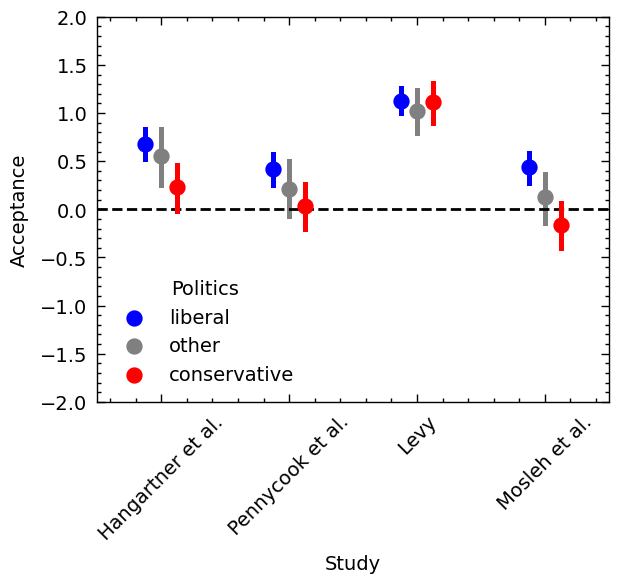

In [25]:
# Use seaborn's pointplot function to create the error plot
sns.pointplot(x="Study", y="value", hue="Politics", data=study_comparison, dodge=0.25, join=False,
              palette={"liberal": "blue", "conservative": "red", "other": "grey"})

# Get the current tick locations and labels
xticks, xticklabels = plt.xticks()

# Set the tick labels to be rotated by 45 degrees
plt.xticks(xticks, xticklabels, rotation=45)

# Adjust the y axis
plt.ylim(-2, 2)
plt.ylabel("Acceptance")

# Add a thin, dashed, horizontal line through 0 on the y-axis using the axhline function
plt.axhline(0, linestyle="--", linewidth=1, color="black")

# Show the plot
plt.show()

### Version 2

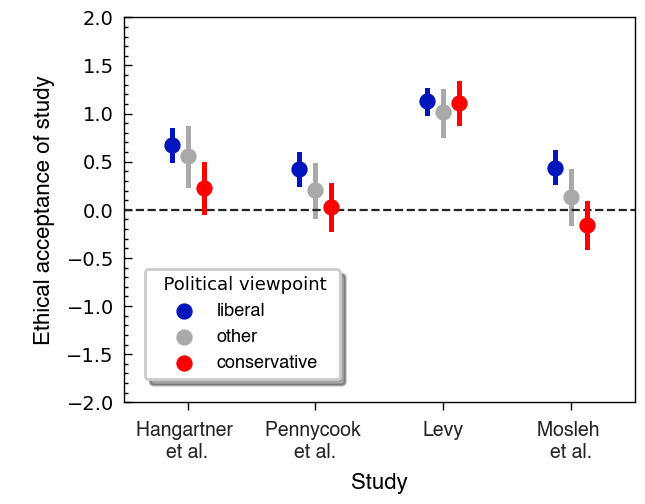

In [26]:
# Use seaborn's pointplot function to create the error plot
sns.pointplot(x="Study", y="value", hue="Politics", data=study_comparison, dodge=0.25, join=False,
              palette={"liberal": "#0015BC", "conservative": "#FF0000", "other": "darkgrey"})

# Get the current tick locations and labels
xticks, xticklabels = plt.xticks()

# New x axis labels
xlabels = ['Hangartner \net al.', 'Pennycook \net al.', 'Levy', 'Mosleh \net al.']

# Set the tick labels to be rotated by 45 degrees
plt.xticks(xticks, xlabels, rotation=0, fontsize=7, font='Helvetica', color='#242423')

# Adjust the y axis
plt.ylim(-2, 2)
plt.ylabel("\nEthical acceptance of study", font='Helvetica', fontsize=8)

# Add a thin, dashed, horizontal line through 0 on the y-axis using the axhline function
plt.axhline(0, linestyle="--", linewidth=.8, color="#242423")

# Remove tick labels
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',     # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    direction="out")         

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,       # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off

plt.xlabel('Study', fontsize=8, color='black', font='Helvetica')

plt.legend(title="  Political viewpoint ", bbox_to_anchor=(0.44, 0.37),
           ncol=1, fancybox=True, shadow=True, frameon=True, title_fontsize=6.5,
           prop={"family":"Helvetica", "size":6.5})

plt.savefig('../reports/figures/ic2s2-fig1b.svg', bbox_inches='tight', dpi=1200)

### Study design features

**VS**: The below code has been updated to match the updated column order

In [27]:
# Select columns with index positions 28 through 37 (inclusive)
design_fts = digex_df.iloc[:, 28:37]

# Recode the values in the column using the replace function
design_fts = design_fts.replace({"Not at all important": 1, "Slightly important": 2, "Moderately important": 3, "Very important": 4, "Extremely important": 5})

In [28]:
design_plot = design_fts.melt(var_name="Feature", value_name="Importance")

# Update column order to reflect ranking of features (in descending order)
cols_descending = list(
    dict(design_fts.mean(numeric_only=True).sort_values(ascending=False)).keys()
)

design_fts = design_fts[cols_descending]

In [29]:
# inspect average importance rating of each study design feature
design_fts.mean(numeric_only=True).sort_values(ascending=False)

design_partic_aware    3.799599
design_cont            3.464930
design_inter_type      3.438878
design_type_data       3.376754
design_res_purp        3.360721
design_inter_impact    3.310621
design_admin_inter     2.917836
design_len_data        2.861723
design_num_users       2.857715
dtype: float64

#### Plot 1 

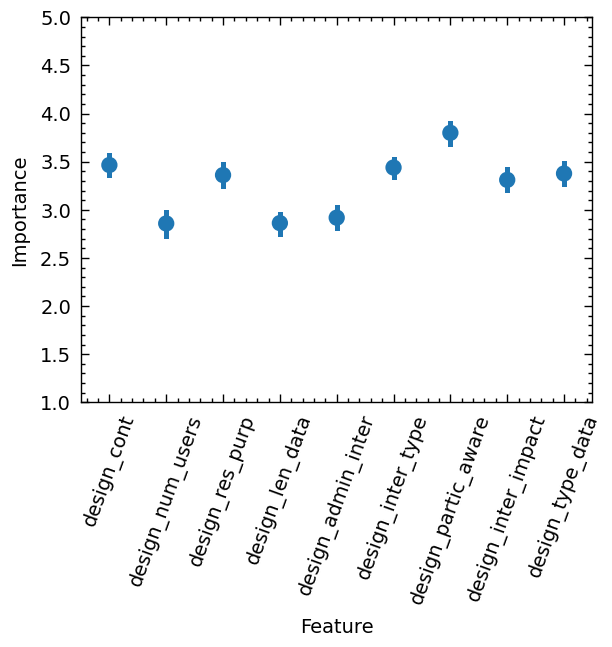

In [30]:
# Use seaborn's pointplot function to create the error plot
sns.pointplot(x="Feature", y="Importance", data=design_plot, join=False)

# Shift the x-axis ticks to the left using the tick_params function
plt.tick_params(axis='x', labelrotation=70)

# Adjust the y axis
plt.ylim(1, 5)

# Show the plot
plt.show()

#### Plot 2

In [32]:
# replace variable abbreviations in Feature column with variable names
feature_var_names = list(
    pd.read_html('../reports/variable-table.html')[0].iloc[28:37,2]
)

design_plot['Feature'].replace(
    dict(zip(design_plot.Feature.unique(), feature_var_names)), inplace=True
)

label_order = [
    'participant awareness of study',
     'content of data',
     'type of intervention',
     'type of data',
     'research purpose',
     'impact of intervention',
     'administration of intervention',
     'length of data collection',
     'number of users studied'
]

df['Feature'] = pd.Categorical(df['Feature'], label_order)

df = df.sort_values(['Feature','Importance'])

grouped = df.groupby("Feature", sort=False)

# plot figure using joypy
fig, ax = joypy.joyplot(grouped, 
                        column='Importance', 
                        linewidth=.5,
                        # labels=labels,
                        figsize=(6,3),
                        grid=True,
                        colormap=cm.Wistia_r)

plt.tick_params(axis='x', colors='#4d4d4d') 
for ax in ax:
    label = ax.get_yticklabels()
    label[0].set_color('#242423')
    label[0].set_font('Helvetica')

    
plt.xlabel('\n\n\nImportance',  fontsize=8, color='black', font='Helvetica')
plt.text(-1.9, 0.41, 'Factors', fontsize=8, color='black', rotation=90, font='Helvetica')

plt.text(0.66, -0.13, '$\,$not at all\nimportant', fontsize=7, color='#242423', font='Helvetica')
plt.text(2.64, -0.13, 'moderately\n important', fontsize=7, color='#242423', font='Helvetica')
plt.text(4.68, -0.13, 'extremely\nimportant', fontsize=7, color='#242423', font='Helvetica')

plt.savefig('../reports/figures/ic2s2-fig1c.svg', bbox_inches='tight', dpi=1200)

ImportError: lxml not found, please install it

**Attitudes on the importance of different study design factors.** Distribution of importance ratings for study design factors. Participants responded to the question “How important are the following factors for determining your level of concern with academic research conducted on social media, such as online experiments?", and had to answer using a 5-point rating scale (1 = not at all important, 5 = extremely important).

#### Ranking order

In [34]:
design_fts.mean(numeric_only=True).sort_values(ascending=False)

design_partic_aware    3.799599
design_cont            3.464930
design_inter_type      3.438878
design_type_data       3.376754
design_res_purp        3.360721
design_inter_impact    3.310621
design_admin_inter     2.917836
design_len_data        2.861723
design_num_users       2.857715
dtype: float64

In [35]:
design_fts.median(numeric_only=True).sort_values(ascending=False)

design_partic_aware    4.0
design_cont            4.0
design_inter_type      4.0
design_type_data       4.0
design_res_purp        4.0
design_inter_impact    3.0
design_admin_inter     3.0
design_len_data        3.0
design_num_users       3.0
dtype: float64

In [272]:
# use the below to compute the interquartile range
design_fts.describe()

,design_partic_aware,design_cont,design_inter_type,design_type_data,design_res_purp,design_inter_impact,design_admin_inter,design_len_data,design_num_users
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.799599,3.464930,3.438878,3.376754,3.360721,3.310621,2.917836,2.861723,2.857715
std,1.230437,1.182313,1.132653,1.237930,1.331628,1.294764,1.284470,1.290574,1.435982
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Ethical priorities

In [13]:
ranks = digex_df[['rank_sci_repro', 'rank_resp', 'rank_just', 'rank_anony', 'rank_harms', 'rank_balance', 'rank_pub_interst']]

Ranks by means (lower value = higher priority).

In [14]:
ranks_means = ranks.mean()
ranks_means.sort_values(inplace=True, ascending=True)
ranks_means

rank_harms          2.697395
rank_anony          3.054108
rank_resp           3.527054
rank_pub_interst    3.573146
rank_just           4.651303
rank_balance        4.975952
rank_sci_repro      5.521042
dtype: float64

Ranks by Borda count (higher value = higher priority).

In [15]:
ranks_borda = ranks.replace({1:6, 2:5, 3:4, 4:3, 5:2, 6:1, 7:0})    
ranks_borda = ranks_borda.sum()
ranks_borda.sort_values(inplace=True, ascending=False)
ranks_borda

rank_harms          2147.0
rank_anony          1969.0
rank_resp           1733.0
rank_pub_interst    1710.0
rank_just           1172.0
rank_balance        1010.0
rank_sci_repro       738.0
dtype: float64

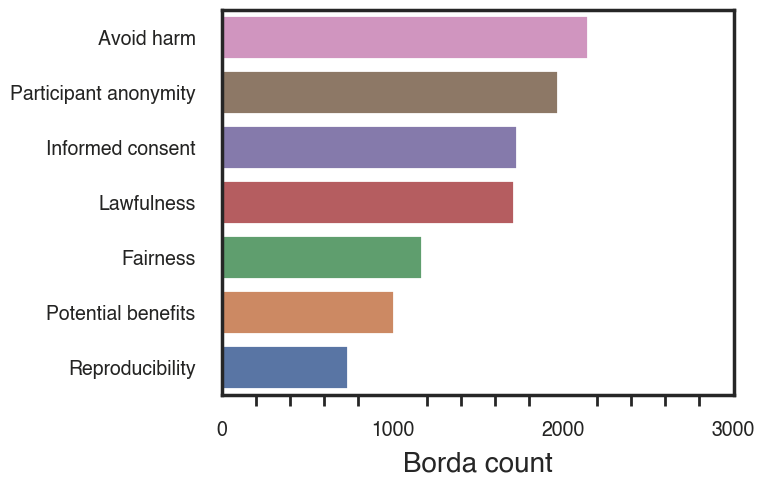

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given data
ranks_borda = pd.Series({
    'Avoid harm': 2147.0,
    'Participant anonymity': 1969.0,
    'Informed consent': 1733.0,
    'Lawfulness': 1710.0,
    'Fairness': 1172.0,
    'Potential benefits': 1010.0,
    'Reproducibility': 738.0
})

# Sort the ranks in ascending order
ranks_borda.sort_values(ascending=True, inplace=True)

# Create a horizontal bar chart using seaborn
sns.barplot(x=ranks_borda.values, y=ranks_borda.index)

# Adjust the x-axis label
plt.xlabel("Borda count", fontname='Helvetica', fontsize=10)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    bottom=True) # labels along the bottom edge are off  

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    top=False)         # ticks along the top edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,       # ticks along the bottom edge are off
    right=False)         # ticks along the top edge are off

# Adjust the y-axis tick labels
plt.yticks(rotation=0, fontsize=7, fontname='Helvetica', color='#242423')

# Set the tick labels on the x-axis
plt.xticks(fontsize=7, fontname='Helvetica', color='#242423')

# Set x-axis range
plt.xlim(0, 3000)

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()
